### https://mp.weixin.qq.com/s?__biz=MzIyNDM4ODI0OA==&mid=2247494446&idx=1&sn=8f8c45507611a47986fe199ca591af85&chksm=e80d1ed9df7a97cf55073ee686ddcffdce7d5ea65996e9f3a667ebd615b604a5eef00e6afceb&scene=126&sessionid=1606708894&key=f47fc4982c12da270c65e32fbb52a9e4bdef3ee1f5e917a940914939f230de1d9b30299adb3d8cb452a6d61cda681ca378c5feea27cee1e0bcffba08131aa889bc562ff5c22c5651aefc1cf2daa66eeb7a7d3f931ee69d1957375fd2ff57fc20ae1168fe8f3cac5ba1cfb49130b2fdf241e25713f13b6e93fdf49c9b6dca29d6&ascene=1&uin=ODMyNzMwNjQx&devicetype=Windows+10+x64&version=6300002f&lang=zh_CN&exportkey=Ar6kH7QrhdL7wS46azIObnU%3D&pass_ticket=hTJZ%2FHrrUDdKR8RJClXwDlLn%2B5DCA%2FBesEXoQEzsuICC4%2FNjFRT4bqsDLOB04PuA&wx_header=0

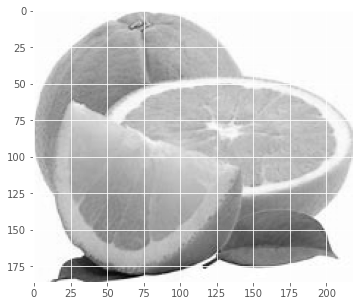

In [8]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def load(pic):
    i = Image.open(pic)
    g = i.convert('L')
    mat = np.array(g).astype(np.uint8)
    return mat

mat = load('orange.png')
plt.figure(figsize=(10, 5))
plt.imshow(mat, cmap='gray')
plt.show()

In [9]:
U, Sigma, V = np.linalg.svd(mat)
U.shape, Sigma.shape, V.shape
((383, 383), (383,), (492, 492))

((383, 383), (383,), (492, 492))

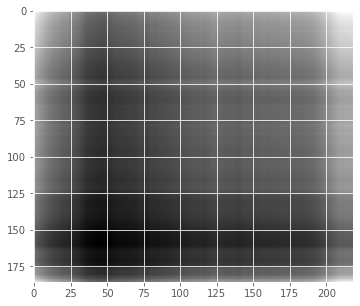

In [10]:
k = 1
re_img = U[:, :k] @ np.diag(Sigma[:k]) @ V[:k, :]

plt.figure(figsize=(10, 5))
plt.imshow(re_img, cmap='gray');

In [11]:
def select_k(sigma, pcent):
    s = np.add.accumulate(sigma)
    s = s/s[-1]
    return np.where((s>=pcent)==True)[0][0]  
select_k(Sigma, 0.9)

38

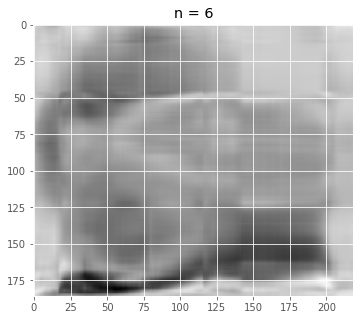

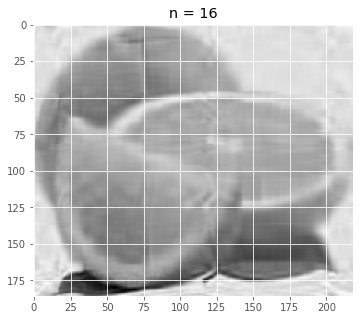

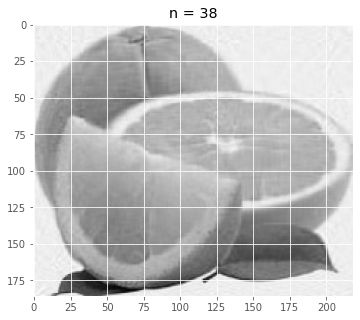

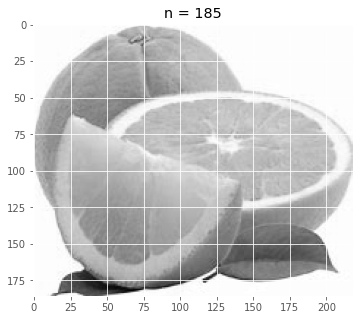

In [12]:
# 查看前百分之 70、80、90、100 的重建效果
for i in [select_k(Sigma, 0.7), select_k(Sigma, 0.8), select_k(Sigma, 0.9), select_k(Sigma, 1.0)]:
    re_img = U[:, :i] @ np.diag(Sigma[:i]) @ V[:i, :]
    
    plt.figure(figsize=(10, 5))
    plt.imshow(re_img, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

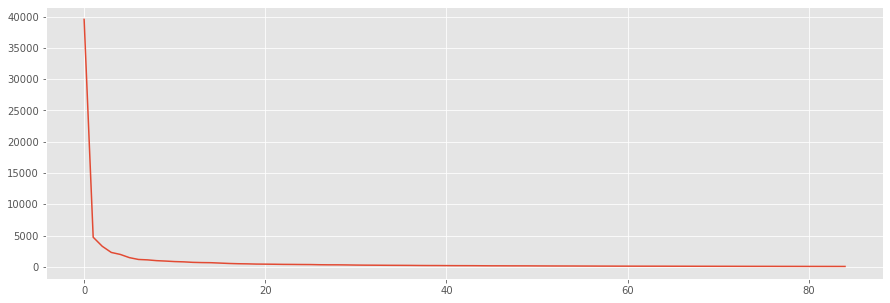

In [13]:
plt.figure(figsize=(15, 5))
plt.plot(Sigma[:85]);